In [23]:
# Matplotlib forms basis for visualization in Python
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns

sns.set(rc={"figure.figsize":(16, 8)}) #width=3, #height=4
import matplotlib.pyplot as plt
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [24]:
headers = ['player_name','year_start', 'year_end','position', 'height', 'weight', 'birth_date', 'college']


df1 = pd.read_csv("player_data.csv",
                  header=None, names=headers, na_values="?")

thrs = 0.1
df1 = df1.drop(index=[0])
df1 = df1.fillna(df1.median())
df1 = df1.loc[df1.isnull().mean(axis=1) < thrs]


/tmp/ipykernel_15442/3238874555.py:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = df1.fillna(df1.median())


In [25]:
height_list = df1['height'].str.split('-').tolist()
birth_date_list = df1['birth_date'].str.split(':,').tolist()

height_int = []
height_cm = []
for element in height_list:
    ind = height_list.index(element)
    height_int.append([eval(x) for x in height_list[ind]])
for i in height_int:
    i[0] = i[0] * 30.48
    i[1] = i[1] * 2.54
    l = round(i[0] + i[1])
    height_cm.append(l)
    
df1['height'] = height_cm

In [26]:
weight_list = df1['weight'].tolist()

weight_cm = []
for index in enumerate(weight_list):
    num = round(int(index[1])/2.2)
    weight_cm.append(num)
weight_cm = np.nan_to_num(weight_cm)

df1['weight'] = weight_cm

In [27]:
import re

birth_date_int = []
birth_date_list = str(birth_date_list)
def yearParser(my_list):
    tpl = "(?!0{4})\d{4}"
    for match in re.findall(tpl, my_list):
        if match == 0:
            return None
        else:
            return re.findall(tpl, my_list)

df1['birth_date'] = yearParser(birth_date_list)

In [28]:
df1["height"] = df1["height"].astype('float64')
df1["weight"] = df1["weight"].astype('float64')
df1["year_start"] = df1["year_start"].astype('int64')
df1["year_end"] = df1["year_end"].astype('int64')
df1["birth_date"] = df1["birth_date"].astype('int64')

In [29]:
df2 = pd.read_csv("Players.csv")

df2 = df2.fillna(df2.median())
df2 = df2.loc[df2.isnull().mean(axis=1) < thrs]
df2 = df2.rename(columns = {"Player": "player_name"})
df2 = df2.reindex(columns=['player_name', 'birth_city'])
df2[df2.isnull().any(axis=1)]

/tmp/ipykernel_15442/1938453583.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df2.fillna(df2.median())


,player_name,birth_city


In [30]:
df3 = pd.merge(left=df1,
         right=df2,
         on="player_name")

In [31]:
df4 = pd.read_csv('Seasons_Stats.csv')
df4 = df4.rename(columns = {"Player": "player_name"})
df4 = df4.fillna(df4.median())
df4 = df4.loc[df4.isnull().mean(axis=1) < thrs]
df4.pop('blanl')
df4.pop('blank2')
df4.pop('Unnamed: 0')

/tmp/ipykernel_15442/77363702.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4 = df4.fillna(df4.median())


0            0
1            1
2            2
3            3
4            4
         ...  
24686    24686
24687    24687
24688    24688
24689    24689
24690    24690
Name: Unnamed: 0, Length: 24691, dtype: int64

In [32]:
df5 = pd.merge(left = df4, right = df3, on = 'player_name')
df5['Year'] = df5['Year'].astype('int64')
df5.head()

,Year,player_name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,PF,PTS,year_start,year_end,position,height,weight,birth_date,college,birth_city
0,1950,Cliff Barker,SG,29.0,INO,49.0,8.0,1053.0,12.7,0.435,...,99.0,279.0,1950,1952,G,188.0,84.0,1921,University of Kentucky,Yorktown
1,1951,Cliff Barker,SG,30.0,INO,56.0,8.0,1053.0,12.7,0.322,...,98.0,152.0,1950,1952,G,188.0,84.0,1921,University of Kentucky,Yorktown
2,1952,Cliff Barker,SG,31.0,INO,44.0,8.0,494.0,10.8,0.343,...,56.0,126.0,1950,1952,G,188.0,84.0,1921,University of Kentucky,Yorktown
3,1950,Ralph Beard,G,22.0,INO,60.0,8.0,1053.0,12.7,0.422,...,132.0,895.0,1950,1951,G,178.0,80.0,1927,University of Kentucky,Hardinsburg
4,1951,Ralph Beard,G,23.0,INO,66.0,8.0,1053.0,12.7,0.435,...,96.0,1111.0,1950,1951,G,178.0,80.0,1927,University of Kentucky,Hardinsburg


In [33]:
df5['Pl_acc_lvl']=df5['TS%'].apply(lambda x: 'low' if x<0.4 else 'middle' if x<0.48 else 'high')
df5['Pl_eff_lvl']=df5['PER'].apply(lambda x: 'low' if x<5.0 else 'middle' if x<65.0 else 'high')
df6 = df5[['player_name', 'Age', 'TS%', 'Pl_acc_lvl', 'PER', 'Pl_eff_lvl', 'OWS', 'DWS', 'USG%', 'AST%', 'FG']]

df6['TS%'].value_counts()

0.506    223
0.500    200
0.000    180
0.521    165
0.534    156
        ... 
0.770      1
0.101      1
0.211      1
0.236      1
0.799      1
Name: TS%, Length: 595, dtype: int64

In [34]:
df6["PER"].value_counts()

 12.7    446
 11.8    227
 12.3    213
 13.1    212
 12.9    210
        ... 
-2.5       1
-19.8      1
-8.6       1
 27.8      1
 39.3      1
Name: PER, Length: 515, dtype: int64

In [35]:
df5["G"].value_counts()

82.0    1465
81.0     803
80.0     722
79.0     601
78.0     467
        ... 
83.0      18
84.0      10
85.0       5
86.0       2
87.0       1
Name: G, Length: 87, dtype: int64

In [36]:
df5['Pl_acc_lvl']=df5['Pl_acc_lvl'].astype('category')
df5['Pl_acc_lvl'].cat.reorder_categories(['low','middle','high'], inplace=True)

df5['Pl_eff_lvl']=df5['Pl_eff_lvl'].astype('category')
df5['Pl_eff_lvl'].cat.reorder_categories(['low','middle','high'], inplace=True)

df_acc = df6.groupby(by=['Pl_acc_lvl'],as_index=False)[['FG']].apply(lambda v: v.max()-v.min())
df_acc

/tmp/ipykernel_15442/2497895788.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df5['Pl_acc_lvl'].cat.reorder_categories(['low','middle','high'], inplace=True)
/tmp/ipykernel_15442/2497895788.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df5['Pl_eff_lvl'].cat.reorder_categories(['low','middle','high'], inplace=True)


,Pl_acc_lvl,FG
0,high,925.0
1,low,501.0
2,middle,784.0


In [37]:
df5.shape

(20389, 60)

<AxesSubplot: xlabel='position', ylabel='PTS'>

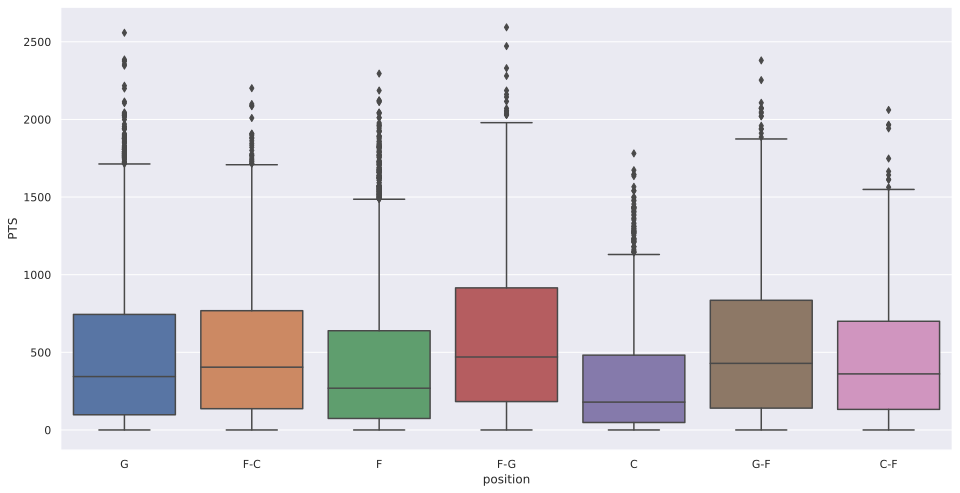

In [38]:
sns.boxplot(x="position", y="PTS", data=df5)

<AxesSubplot: xlabel='Pl_acc_lvl', ylabel='FG'>

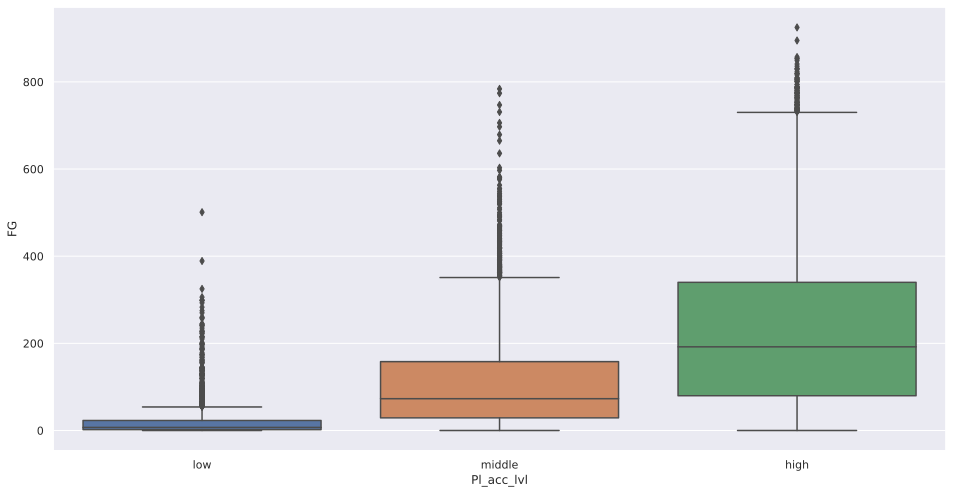

In [39]:
sns.boxplot(x="Pl_acc_lvl", y="FG", data=df5)

<AxesSubplot: xlabel='Pl_eff_lvl', ylabel='Age'>

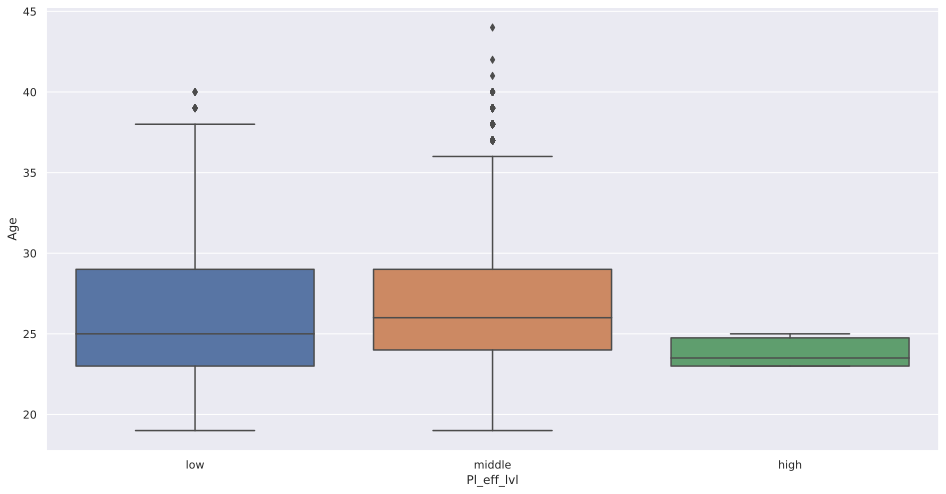

In [40]:
sns.boxplot(x="Pl_eff_lvl", y="Age", data=df5)

<AxesSubplot: xlabel='Age', ylabel='MP'>

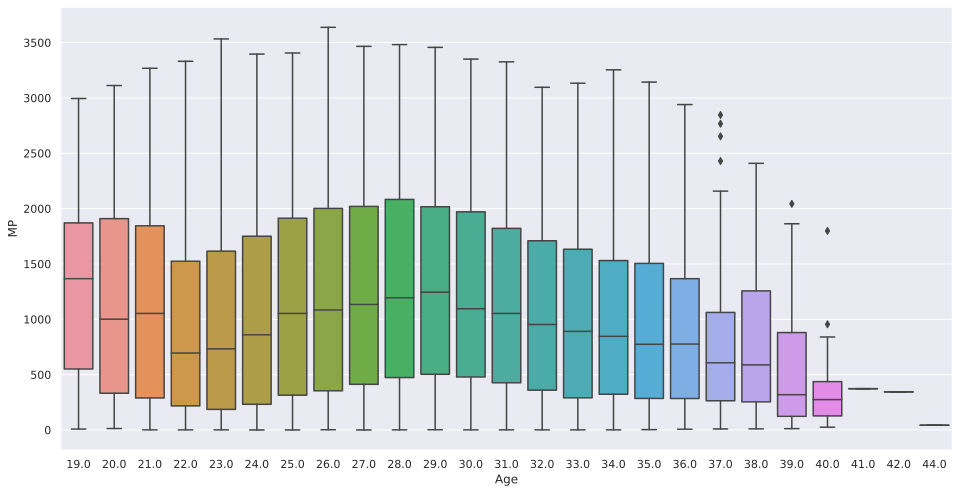

In [41]:
sns.boxplot(x="Age", y="MP", data=df5)

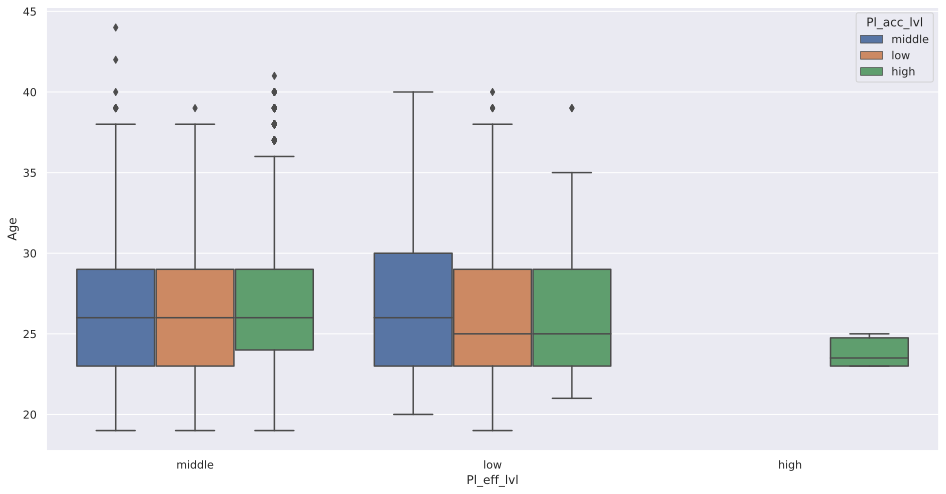

In [42]:
sns.boxplot(x="Pl_eff_lvl", hue="Pl_acc_lvl", y="Age", data=df6);

In [43]:
train_df = pd.read_csv('merged_df.csv')

train_df['Age'].value_counts()

24.0    2387
23.0    2336
25.0    2158
26.0    2017
27.0    1758
22.0    1567
28.0    1507
29.0    1301
30.0    1199
31.0     972
32.0     790
33.0     579
21.0     456
34.0     427
35.0     277
20.0     190
36.0     177
37.0     116
38.0      70
19.0      51
39.0      38
40.0      13
41.0       1
42.0       1
44.0       1
Name: Age, dtype: int64

<AxesSubplot: xlabel='position', ylabel='FG'>

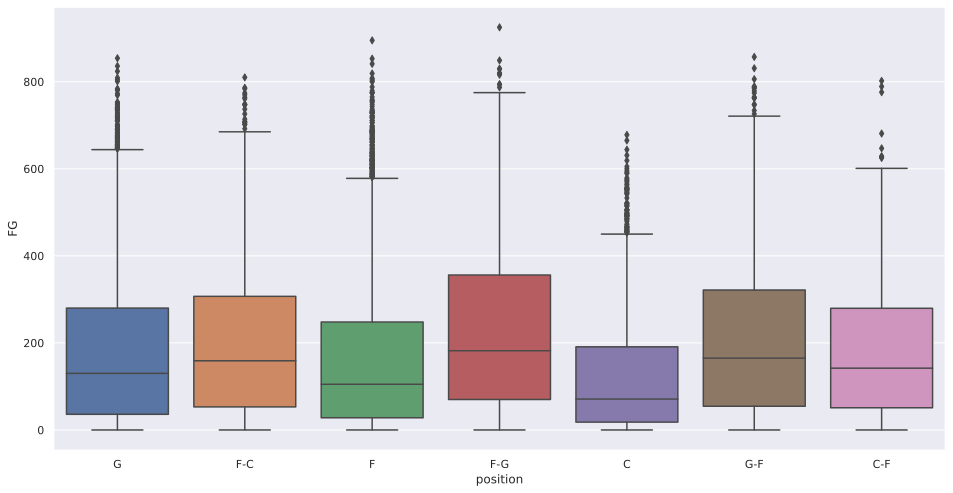

In [44]:
sns.boxplot(x="position", y="FG", data=df5)